This case study will deal more with **cleaning** messy dataset

1. cleaning column labels
2. filtering, drop missing data, deduplicating
3. fixing data types

## Importing datasets

Use `all_alpha_08.csv` and `all_alpha_18.csv`

In [1]:
# load datasets
import pandas as pd

df_08 = pd.read_csv('all_alpha_08.csv') 
df_18 = pd.read_csv('all_alpha_18.csv')

---
## `1.` Cleaning Column Labels

### Drop Extraneous Columns
Visually inspect the dataset and drop columns that are not necessary for the analysis

In [2]:
print(df_08.columns)
df_08.head() # Stnd, Underhood ID, FE Calc Appr, Unadj Cmb MPG are not necessary

Index(['Model', 'Displ', 'Cyl', 'Trans', 'Drive', 'Fuel', 'Sales Area', 'Stnd',
       'Underhood ID', 'Veh Class', 'Air Pollution Score', 'FE Calc Appr',
       'City MPG', 'Hwy MPG', 'Cmb MPG', 'Unadj Cmb MPG',
       'Greenhouse Gas Score', 'SmartWay'],
      dtype='object')


,Model,Displ,Cyl,Trans,Drive,Fuel,Sales Area,Stnd,Underhood ID,Veh Class,Air Pollution Score,FE Calc Appr,City MPG,Hwy MPG,Cmb MPG,Unadj Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXT03.7PKR,SUV,7,Drv,15,20,17,22.0527,4,no
1,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,FA,B5,8HNXT03.7PKR,SUV,6,Drv,15,20,17,22.0527,4,no
2,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXT02.3DKR,SUV,7,Drv,17,22,19,24.1745,5,no
3,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,FA,B5,8HNXT02.3DKR,SUV,6,Drv,17,22,19,24.1745,5,no
4,ACURA RL,3.5,(6 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXV03.5HKR,midsize car,7,Drv,16,24,19,24.5629,5,no


In [3]:
# drop columns from 2008 dataset
columns_drop = ['Stnd', 'Underhood ID', 'FE Calc Appr', 'Unadj Cmb MPG']
df_08.drop(columns_drop, axis=1, inplace = True)

# confirm changes
df_08.head(1)

,Model,Displ,Cyl,Trans,Drive,Fuel,Sales Area,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,15,20,17,4,no


In [4]:
print(df_18.columns)
df_18.head() # Stnd, Stnd Description, Underhood ID, Comb CO2 are not necessary

Index(['Model', 'Displ', 'Cyl', 'Trans', 'Drive', 'Fuel', 'Cert Region',
       'Stnd', 'Stnd Description', 'Underhood ID', 'Veh Class',
       'Air Pollution Score', 'City MPG', 'Hwy MPG', 'Cmb MPG',
       'Greenhouse Gas Score', 'SmartWay', 'Comb CO2'],
      dtype='object')


,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Stnd,Stnd Description,Underhood ID,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay,Comb CO2
0,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,JHNXT03.5GV3,small SUV,3,20,28,23,5,No,386
1,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,CA,U2,California LEV-II ULEV,JHNXT03.5GV3,small SUV,3,20,28,23,5,No,386
2,ACURA RDX,3.5,6.0,SemiAuto-6,4WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,JHNXT03.5GV3,small SUV,3,19,27,22,4,No,402
3,ACURA RDX,3.5,6.0,SemiAuto-6,4WD,Gasoline,CA,U2,California LEV-II ULEV,JHNXT03.5GV3,small SUV,3,19,27,22,4,No,402
4,ACURA TLX,2.4,4.0,AMS-8,2WD,Gasoline,CA,L3ULEV125,California LEV-III ULEV125,JHNXV02.4WH3,small car,3,23,33,27,6,No,330


In [5]:
# drop columns from 2008 dataset
columns_drop = ['Stnd', 'Stnd Description', 'Underhood ID', 'Comb CO2']
df_18.drop(columns_drop, axis=1, inplace = True)

# confirm changes
df_18.head(1)

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,FA,small SUV,3,20,28,23,5,No


### Rename Columns

In [6]:
# before that, check if column names share the same across 2008 and 2018 dataset
df_08.columns == df_18.columns # Cert Region vs Sales Area

array([ True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True])

In [7]:
# change Sales Area to Cert Region for 2008 datset
df_08.rename(columns={'Sales Area': 'Cert Region'}, inplace=True)

# confirm changes
df_08.columns == df_18.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [8]:
# replace spaces with underscores and lowercase labels for 2008 dataset
df_08.rename(columns=lambda x: x.strip().lower().replace(' ', '_'), inplace=True)
df_18.rename(columns=lambda x: x.strip().lower().replace(' ', '_'), inplace=True)

In [9]:
# confirm changes
df_08.head(1)

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,15,20,17,4,no


In [10]:
df_18.head(1)

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,FA,small SUV,3,20,28,23,5,No


---
## `2.` Filter, Drop Nulls, Dedupe

### Filter by Certification Region
Filter datasets for rows following California standards. 
<br> Drop cert_region column after filtering.

In [11]:
df_08.cert_region.unique(), df_18.cert_region.unique()

(array(['CA', 'FA', 'FC'], dtype=object), array(['FA', 'CA'], dtype=object))

In [12]:
df_08 = df_08.query('cert_region == "CA"') 
df_18 = df_18.query('cert_region == "CA"') 

In [13]:
# confirm changes
df_08.cert_region.unique(), df_18.cert_region.unique()

(array(['CA'], dtype=object), array(['CA'], dtype=object))

In [14]:
df_08.drop(columns=['cert_region'], inplace = True)
df_18.drop(columns=['cert_region'], inplace = True)

### Drop Rows with Missing Values

In [15]:
df_08.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1084 entries, 0 to 2400
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   model                 1084 non-null   object 
 1   displ                 1084 non-null   float64
 2   cyl                   1009 non-null   object 
 3   trans                 1009 non-null   object 
 4   drive                 1047 non-null   object 
 5   fuel                  1084 non-null   object 
 6   veh_class             1084 non-null   object 
 7   air_pollution_score   1084 non-null   object 
 8   city_mpg              1009 non-null   object 
 9   hwy_mpg               1009 non-null   object 
 10  cmb_mpg               1009 non-null   object 
 11  greenhouse_gas_score  1009 non-null   object 
 12  smartway              1084 non-null   object 
dtypes: float64(1), object(12)
memory usage: 118.6+ KB


In [16]:
df_08.isnull().sum() # .isnull() returns True or False and .sum() to see # missing data

model                    0
displ                    0
cyl                     75
trans                   75
drive                   37
fuel                     0
veh_class                0
air_pollution_score      0
city_mpg                75
hwy_mpg                 75
cmb_mpg                 75
greenhouse_gas_score    75
smartway                 0
dtype: int64

In [17]:
df_18.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 798 entries, 1 to 1609
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   model                 798 non-null    object 
 1   displ                 797 non-null    float64
 2   cyl                   797 non-null    float64
 3   trans                 798 non-null    object 
 4   drive                 798 non-null    object 
 5   fuel                  798 non-null    object 
 6   veh_class             798 non-null    object 
 7   air_pollution_score   798 non-null    int64  
 8   city_mpg              798 non-null    object 
 9   hwy_mpg               798 non-null    object 
 10  cmb_mpg               798 non-null    object 
 11  greenhouse_gas_score  798 non-null    int64  
 12  smartway              798 non-null    object 
dtypes: float64(2), int64(2), object(9)
memory usage: 87.3+ KB


In [18]:
df_18.isnull().sum()

model                   0
displ                   1
cyl                     1
trans                   0
drive                   0
fuel                    0
veh_class               0
air_pollution_score     0
city_mpg                0
hwy_mpg                 0
cmb_mpg                 0
greenhouse_gas_score    0
smartway                0
dtype: int64

There is a couple of ways to deal with missing values: 
- fill up with more data collection, 
- infer / interpolate from other related features,
- drop, ...

here we will drop the missing data because there is no way to collect and data after dropping is sufficient to draw conclusion

In [19]:
df_08 = df_08.dropna(axis=0, how='any')
df_18 = df_18.dropna(axis=0, how='any')

In [20]:
# confirm changes - should return 0
df_08.isnull().any().sum(), df_18.isnull().any().sum()

(0, 0)

### Dedupe Data
Inspect duplication of data 

In [21]:
print(df_08.duplicated().sum())
df_08[df_08.duplicated(subset=None, keep='first')] # showing first row of the duplicated rows

23


,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
279,CADILLAC CTS,3.6,(6 cyl),Man-6,2WD,Gasoline,midsize car,6,16,25,19,5,no
400,CHEVROLET HHR,2.2,(4 cyl),Auto-L4,2WD,Gasoline,SUV,7,22,30,25,7,yes
404,CHEVROLET HHR,2.4,(4 cyl),Auto-L4,2WD,Gasoline,SUV,7,22,28,24,7,yes
828,FORD Explorer,4.6,(8 cyl),Auto-L6,2WD,Gasoline,SUV,7,13,20,16,4,no
830,FORD Explorer,4.6,(8 cyl),Auto-L6,4WD,Gasoline,SUV,7,13,19,15,3,no
838,FORD Explorer Sport Trac,4.6,(8 cyl),Auto-L6,2WD,Gasoline,pickup,7,13,20,16,4,no
840,FORD Explorer Sport Trac,4.6,(8 cyl),Auto-L6,4WD,Gasoline,pickup,7,13,19,15,3,no
863,FORD F150 STX SE,5.4,(8 cyl),Auto-L4,2WD,Gasoline,pickup,7,14,19,15,3,no
929,FORD Ranger,3.0,(6 cyl),Auto-L5,2WD,Gasoline,pickup,7,15,20,17,4,no
930,FORD Ranger,3.0,(6 cyl),Man-5,2WD,Gasoline,pickup,7,16,22,18,5,no


In [22]:
print(df_18.duplicated().sum())
df_18[df_18.duplicated(subset=None, keep=False)] # showing all duplicated rows

3


,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
17,ALFA ROMEO Giulia,2.9,6.0,Auto-8,2WD,Gasoline,midsize car,3,17,24,20,4,No
18,ALFA ROMEO Giulia,2.9,6.0,Auto-8,2WD,Gasoline,midsize car,3,17,24,20,4,No
733,HONDA Fit,1.5,4.0,Man-6,2WD,Gasoline,station wagon,3,29,36,31,7,Yes
734,HONDA Fit,1.5,4.0,Man-6,2WD,Gasoline,station wagon,3,29,36,31,7,Yes
1129,MERCEDES-BENZ AMG GLE63 S,5.5,8.0,Auto-7,4WD,Gasoline,standard SUV,3,14,18,15,2,No
1130,MERCEDES-BENZ AMG GLE63 S,5.5,8.0,Auto-7,4WD,Gasoline,standard SUV,3,14,18,15,2,No


Here we would like to inspect fuel economy by model so duplicated models should be dropped.

In [23]:
df_08.drop_duplicates(keep='first', inplace=True) # be aware: keep=False will drop 
df_18.drop_duplicates(keep='first', inplace=True) # all duplicates 

In [24]:
# confirm changes - should return 0
df_08.duplicated().sum(), df_18.duplicated().sum()

(0, 0)

In [25]:
# confirm changes - size of dataset
df_08.shape, df_18.shape

((986, 13), (794, 13))

After dropping some unnecessary rows, indexing becomes messy. 
<br> Use .reset_index method to rearrange indexing from 0 to end

In [26]:
# reset index after dropping unncessary data
df_08.reset_index(drop=True, inplace=True)
df_18.reset_index(drop=True, inplace=True)

In [27]:
# confirm changes
df_08.tail(3)

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
983,VOLVO XC 90,3.2,(6 cyl),Auto-S6,2WD,Gasoline,SUV,7,14,20,16,4,no
984,VOLVO XC 90,3.2,(6 cyl),Auto-S6,4WD,Gasoline,SUV,7,14,20,16,4,no
985,VOLVO XC 90,4.4,(8 cyl),Auto-S6,4WD,Gasoline,SUV,7,13,19,15,3,no


In [28]:
# confirm changes
df_18.tail(3)

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
791,VOLVO XC 90,2.0,4.0,SemiAuto-8,4WD,Gasoline,standard SUV,5,22,28,24,5,No
792,VOLVO XC 90,2.0,4.0,SemiAuto-8,4WD,Gasoline,standard SUV,5,20,27,23,5,No
793,VOLVO XC 90,2.0,4.0,SemiAuto-8,4WD,Gasoline/Electricity,standard SUV,7,26/63,30/61,27/62,10,Elite


---
## `3.` Fixing Data Types
Use .info() method to find irrelevant data types

In [29]:
df_08.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   model                 986 non-null    object 
 1   displ                 986 non-null    float64
 2   cyl                   986 non-null    object 
 3   trans                 986 non-null    object 
 4   drive                 986 non-null    object 
 5   fuel                  986 non-null    object 
 6   veh_class             986 non-null    object 
 7   air_pollution_score   986 non-null    object 
 8   city_mpg              986 non-null    object 
 9   hwy_mpg               986 non-null    object 
 10  cmb_mpg               986 non-null    object 
 11  greenhouse_gas_score  986 non-null    object 
 12  smartway              986 non-null    object 
dtypes: float64(1), object(12)
memory usage: 100.3+ KB


In [30]:
df_18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 794 entries, 0 to 793
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   model                 794 non-null    object 
 1   displ                 794 non-null    float64
 2   cyl                   794 non-null    float64
 3   trans                 794 non-null    object 
 4   drive                 794 non-null    object 
 5   fuel                  794 non-null    object 
 6   veh_class             794 non-null    object 
 7   air_pollution_score   794 non-null    int64  
 8   city_mpg              794 non-null    object 
 9   hwy_mpg               794 non-null    object 
 10  cmb_mpg               794 non-null    object 
 11  greenhouse_gas_score  794 non-null    int64  
 12  smartway              794 non-null    object 
dtypes: float64(2), int64(2), object(9)
memory usage: 80.8+ KB


#### Fixing `cyl` Data Type
- 2008: extract int from string
- 2018: convert float to int

In [31]:
df_08.cyl.value_counts() 

(6 cyl)     409
(4 cyl)     283
(8 cyl)     199
(5 cyl)      48
(12 cyl)     30
(10 cyl)     14
(2 cyl)       2
(16 cyl)      1
Name: cyl, dtype: int64

In [32]:
df_18.cyl.value_counts()

4.0     365
6.0     246
8.0     153
3.0      18
12.0      9
5.0       2
16.0      1
Name: cyl, dtype: int64

In [33]:
# use regex to extract number, and transform it to integer
df_08.cyl = df_08.cyl.str.extract(pat = '(\d+)')
df_08.cyl = df_08.cyl.astype(int)

In [34]:
# change datatype to integer
df_18.cyl = df_18.cyl.astype(int)

In [35]:
# confirm changes
print(df_08.cyl.value_counts())
print(df_18.cyl.value_counts())

6     409
4     283
8     199
5      48
12     30
10     14
2       2
16      1
Name: cyl, dtype: int64
4     365
6     246
8     153
3      18
12      9
5       2
16      1
Name: cyl, dtype: int64


#### Fixing `air_pollution_score` Data Type
- 2008: convert string to float
- 2018: convert int to float

In [36]:
df_08.air_pollution_score.astype(float) # there is an error?!?

ValueError: could not convert string to float: '6/4'

In [38]:
df_18.air_pollution_score.astype(float) # ok on 2018 datset

0      3.0
1      3.0
2      3.0
3      3.0
4      3.0
      ... 
789    7.0
790    5.0
791    5.0
792    5.0
793    7.0
Name: air_pollution_score, Length: 794, dtype: float64

### Figuring out the issue
Looks like this isn't going to be as simple as converting the datatype. According to the error above, the air pollution score value in one of the rows is "6/4" - let's check it out.

In [39]:
df_08.air_pollution_score.value_counts() # there is a weird entry '6/4'

6      500
7      398
9.5     80
9        7
6/4      1
Name: air_pollution_score, dtype: int64

In [40]:
df_08[df_08.air_pollution_score == '6/4']

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
582,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol/gas,small car,6/4,13/18,19/25,15/21,7/6,no


### It's not just the air pollution score!
The mpg columns and greenhouse gas scores also seem to have the same problem - maybe that's why these were all saved as strings! According to [this link](http://www.fueleconomy.gov/feg/findacarhelp.shtml#airPollutionScore), which I found from the PDF documentation:

    "If a vehicle can operate on more than one type of fuel, an estimate is provided for each fuel type."
    
Ohh.. so all vehicles with more than one fuel type, or hybrids, like the one above (it uses ethanol AND gas) will have a string that holds two values - one for each. 

##### The above script is retrieved from Data Analyst Nano Degree course on Udacity

In [41]:
# First, let's get all the hybrids in 2008
hb_08 = df_08[df_08.fuel.str.contains('/')]
hb_08

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
582,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol/gas,small car,6/4,13/18,19/25,15/21,7/6,no


In [42]:
# any hybrids in 2018?
hb_18 = df_18[df_18.fuel.str.contains('/')] # there is a lot

We're going to take each hybrid row and split them into two new rows - one with values for the first fuel type (values before the "/"), and the other with values for the second fuel type (values after the "/"). Let's separate them with two dataframes!

In [43]:
# fuel, air_pollution_score, city_mpg, hwy_mpg, cmb_mpg, greenhouse_gas_score 
hb08_cols = ['fuel', 'air_pollution_score', 'city_mpg', 'hwy_mpg', 'cmb_mpg', 'greenhouse_gas_score']

# we need spliting the data and containing the results in seperate dataframes
temp08_01 = hb_08.copy()
temp08_02 = hb_08.copy()

In [44]:
for col in hb08_cols:
    temp08_01[col] = temp08_01[col].str.split('/').str[0] # first row
    temp08_02[col] = temp08_02[col].str.split('/').str[1] # first row

**[Note]** Alternatively we use .apply() method 
<br>
temp08_01[col] = temp08_01[col].apply(lambda x: x.split('/')[0])

In [45]:
temp08_01

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
582,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol,small car,6,13,19,15,7,no


In [46]:
temp08_02

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
582,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,gas,small car,4,18,25,21,6,no


In [47]:
newRows_08 = temp08_01.append(temp08_02)
newRows_08

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
582,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol,small car,6,13,19,15,7,no
582,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,gas,small car,4,18,25,21,6,no


In [48]:
# appending the edited rows
df_08.append(newRows_08, ignore_index=True)

# droping the existing messy rows
df_08.drop(index=hb_08.index, inplace=True)

In [49]:
# confirm changes
df_08[df_08.fuel.str.contains('/')]

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway


---

In [50]:
hb_18.iloc[:5]

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
52,BMW 330e,2.0,4,SemiAuto-8,2WD,Gasoline/Electricity,small car,3,28/66,34/78,30/71,10,Yes
78,BMW 530e,2.0,4,SemiAuto-8,2WD,Gasoline/Electricity,small car,7,27/70,31/75,29/72,10,Elite
79,BMW 530e,2.0,4,SemiAuto-8,4WD,Gasoline/Electricity,small car,7,27/66,31/68,28/67,10,Elite
92,BMW 740e,2.0,4,SemiAuto-8,4WD,Gasoline/Electricity,large car,3,25/62,29/68,27/64,9,Yes
189,CHEVROLET Impala,3.6,6,SemiAuto-6,2WD,Ethanol/Gas,large car,5,14/18,20/28,16/22,4,No


In [51]:
hb18_cols = ['fuel', 'city_mpg', 'hwy_mpg', 'cmb_mpg']

temp18_01 = hb_18.copy()
temp18_02 = hb_18.copy()

For this next part, we're going use Pandas' apply function. See the docs [here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.apply.html).

In [52]:
for col in hb18_cols:
    temp18_01[col] = temp18_01[col].apply(lambda x: x.split('/')[0])
    temp18_02[col] = temp18_02[col].apply(lambda x: x.split('/')[1])

In [53]:
print(temp18_01.shape[0])
temp18_01.iloc[:5]

38


,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
52,BMW 330e,2.0,4,SemiAuto-8,2WD,Gasoline,small car,3,28,34,30,10,Yes
78,BMW 530e,2.0,4,SemiAuto-8,2WD,Gasoline,small car,7,27,31,29,10,Elite
79,BMW 530e,2.0,4,SemiAuto-8,4WD,Gasoline,small car,7,27,31,28,10,Elite
92,BMW 740e,2.0,4,SemiAuto-8,4WD,Gasoline,large car,3,25,29,27,9,Yes
189,CHEVROLET Impala,3.6,6,SemiAuto-6,2WD,Ethanol,large car,5,14,20,16,4,No


In [54]:
print(temp18_02.shape[0])
temp18_02.iloc[:5]

38


,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
52,BMW 330e,2.0,4,SemiAuto-8,2WD,Electricity,small car,3,66,78,71,10,Yes
78,BMW 530e,2.0,4,SemiAuto-8,2WD,Electricity,small car,7,70,75,72,10,Elite
79,BMW 530e,2.0,4,SemiAuto-8,4WD,Electricity,small car,7,66,68,67,10,Elite
92,BMW 740e,2.0,4,SemiAuto-8,4WD,Electricity,large car,3,62,68,64,9,Yes
189,CHEVROLET Impala,3.6,6,SemiAuto-6,2WD,Gas,large car,5,18,28,22,4,No


In [55]:
newRows_18 = temp18_01.append(temp18_02)
newRows_18

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
52,BMW 330e,2.0,4,SemiAuto-8,2WD,Gasoline,small car,3,28,34,30,10,Yes
78,BMW 530e,2.0,4,SemiAuto-8,2WD,Gasoline,small car,7,27,31,29,10,Elite
79,BMW 530e,2.0,4,SemiAuto-8,4WD,Gasoline,small car,7,27,31,28,10,Elite
92,BMW 740e,2.0,4,SemiAuto-8,4WD,Gasoline,large car,3,25,29,27,9,Yes
189,CHEVROLET Impala,3.6,6,SemiAuto-6,2WD,Ethanol,large car,5,14,20,16,4,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,TOYOTA Sequoia FFV,5.7,8,SemiAuto-6,4WD,Gas,standard SUV,5,13,17,14,1,No
747,TOYOTA Tundra FFV,5.7,8,SemiAuto-6,4WD,Gas,pickup,5,13,17,15,2,No
777,VOLVO S90,2.0,4,SemiAuto-8,4WD,Electricity,midsize car,7,70,72,71,10,Elite
789,VOLVO XC 60,2.0,4,SemiAuto-8,4WD,Electricity,small SUV,7,60,58,59,10,Elite


In [56]:
# appending the edited rows
df_18.append(newRows_18, ignore_index=True)

# droping the existing messy rows
df_18.drop(index=hb_18.index, inplace=True)

In [57]:
# confirm changes
df_18[df_18.fuel.str.contains('/')]

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway


---
#### Back to...Fixing `air_pollution_score` Data Type
- 2008: convert string to float
- 2018: convert int to float

In [58]:
df_08.air_pollution_score = df_08.air_pollution_score.astype(float)
df_18.air_pollution_score = df_18.air_pollution_score.astype(float) 

In [59]:
df_08.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 985 entries, 0 to 985
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   model                 985 non-null    object 
 1   displ                 985 non-null    float64
 2   cyl                   985 non-null    int64  
 3   trans                 985 non-null    object 
 4   drive                 985 non-null    object 
 5   fuel                  985 non-null    object 
 6   veh_class             985 non-null    object 
 7   air_pollution_score   985 non-null    float64
 8   city_mpg              985 non-null    object 
 9   hwy_mpg               985 non-null    object 
 10  cmb_mpg               985 non-null    object 
 11  greenhouse_gas_score  985 non-null    object 
 12  smartway              985 non-null    object 
dtypes: float64(2), int64(1), object(10)
memory usage: 107.7+ KB


In [60]:
df_18.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 756 entries, 0 to 792
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   model                 756 non-null    object 
 1   displ                 756 non-null    float64
 2   cyl                   756 non-null    int64  
 3   trans                 756 non-null    object 
 4   drive                 756 non-null    object 
 5   fuel                  756 non-null    object 
 6   veh_class             756 non-null    object 
 7   air_pollution_score   756 non-null    float64
 8   city_mpg              756 non-null    object 
 9   hwy_mpg               756 non-null    object 
 10  cmb_mpg               756 non-null    object 
 11  greenhouse_gas_score  756 non-null    int64  
 12  smartway              756 non-null    object 
dtypes: float64(2), int64(2), object(9)
memory usage: 82.7+ KB


#### Lastly, Fixing datatypes for numeric features 

In [65]:
num_cols = list(df_08.columns[8:12])
num_cols

['city_mpg', 'hwy_mpg', 'cmb_mpg', 'greenhouse_gas_score']

In [66]:
for col in num_cols:
    df_08[col] = df_08[col].astype(int)
    df_18[col] = df_18[col].astype(int)

In [68]:
print(df_08.info())
df_08.head(3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 985 entries, 0 to 985
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   model                 985 non-null    object 
 1   displ                 985 non-null    float64
 2   cyl                   985 non-null    int64  
 3   trans                 985 non-null    object 
 4   drive                 985 non-null    object 
 5   fuel                  985 non-null    object 
 6   veh_class             985 non-null    object 
 7   air_pollution_score   985 non-null    float64
 8   city_mpg              985 non-null    int64  
 9   hwy_mpg               985 non-null    int64  
 10  cmb_mpg               985 non-null    int64  
 11  greenhouse_gas_score  985 non-null    int64  
 12  smartway              985 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 107.7+ KB
None


,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7.0,15,20,17,4,no
1,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,7.0,17,22,19,5,no
2,ACURA RL,3.5,6,Auto-S5,4WD,Gasoline,midsize car,7.0,16,24,19,5,no


In [69]:
print(df_18.info())
df_18.head(3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 756 entries, 0 to 792
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   model                 756 non-null    object 
 1   displ                 756 non-null    float64
 2   cyl                   756 non-null    int64  
 3   trans                 756 non-null    object 
 4   drive                 756 non-null    object 
 5   fuel                  756 non-null    object 
 6   veh_class             756 non-null    object 
 7   air_pollution_score   756 non-null    float64
 8   city_mpg              756 non-null    int64  
 9   hwy_mpg               756 non-null    int64  
 10  cmb_mpg               756 non-null    int64  
 11  greenhouse_gas_score  756 non-null    int64  
 12  smartway              756 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 82.7+ KB
None


,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA RDX,3.5,6,SemiAuto-6,2WD,Gasoline,small SUV,3.0,20,28,23,5,No
1,ACURA RDX,3.5,6,SemiAuto-6,4WD,Gasoline,small SUV,3.0,19,27,22,4,No
2,ACURA TLX,2.4,4,AMS-8,2WD,Gasoline,small car,3.0,23,33,27,6,No


---
## `4.` Storing cleaned dataset
`cleaned_08.csv` and `cleaned_18.csv`

In [70]:
df_08.to_csv('cleaned_08.csv', index=False)
df_18.to_csv('cleaned_18.csv', index=False)

---
## `5.` Drawing Conclusions
Use the space below to address questions on datasets `clean_08.csv` and `clean_18.csv`

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# load datasets
df_08 = pd.read_csv('clean_08.csv')
df_18 = pd.read_csv('clean_18.csv')

In [4]:
df_08.head(3)

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7.0,15.0,20.0,17.0,4,no
1,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,7.0,17.0,22.0,19.0,5,no
2,ACURA RL,3.5,6,Auto-S5,4WD,Gasoline,midsize car,7.0,16.0,24.0,19.0,5,no


### Q1: Are more unique models using alternative sources of fuel? By how much?

Let's first look at what the sources of fuel are and which ones are alternative sources.

In [5]:
df_08.fuel.value_counts() 

Gasoline    984
gas           1
ethanol       1
CNG           1
Name: fuel, dtype: int64

In [6]:
df_18.fuel.value_counts()

Gasoline       749
Ethanol         26
Gas             26
Diesel          19
Electricity     12
Name: fuel, dtype: int64

Looks like the alternative sources of fuel available in 2008 are CNG and ethanol, and those in 2018 ethanol and electricity. (You can use Google if you weren't sure which ones are alternative sources of fuel!)

In [9]:
alt08 = df_08.query("fuel in ['ethanol','CNG']").model.nunique()
alt08

2

In [10]:
alt18 = df_18.query("fuel in ['Ethanol', 'Electricity']").model.nunique()
alt18

26

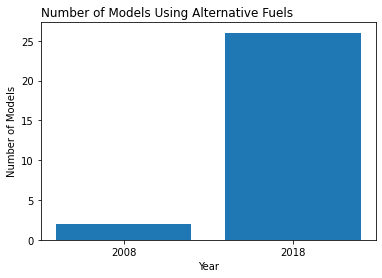

In [15]:
alt_years = ['2008', '2018']
alt_freq = [alt08, alt18]

plt.bar(years, alt_freq)
plt.xlabel('Year')
plt.ylabel('Number of Models')
plt.title('Number of Models Using Alternative Fuels', loc = 'left');

Since 2008, the number of unique models using alternative sources of fuel increased by 24. 

However, the data is presented in absolute terms so it is more meaningful to show much percentage alternative fuels take for the respective year. We can also look at proportions. 

In [16]:
num_model08 = df_08.model.nunique() 
num_model18 = df_18.model.nunique()
print(num_model08, num_model18)

377 357


In [17]:
prop_alt08 = alt08 / num_model08
prop_alt18 = alt18 / num_model18

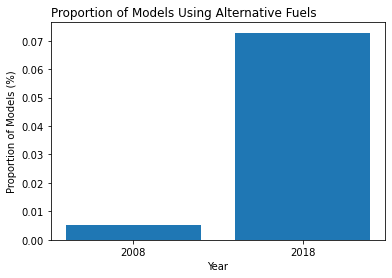

In [20]:
alt_years = ['2008', '2018']
alt_freq_prop = [prop_alt08, prop_alt18]

plt.bar(alt_years, alt_freq_prop);
plt.xlabel('Year')
plt.ylabel('Proportion of Models (%)')
plt.title('Proportion of Models Using Alternative Fuels', loc = 'left');

### Q2: How much have vehicle classes improved in fuel economy?  

Let's look at the average fuel economy for each vehicle class for both years.

In [32]:
veh_econ08 = df_08.groupby('veh_class').cmb_mpg.mean().sort_index()
veh_econ08

veh_class
SUV              18.471429
large car        18.509091
midsize car      21.601449
minivan          19.117647
pickup           16.277108
small car        21.105105
station wagon    22.366667
van              14.952381
Name: cmb_mpg, dtype: float64

In [34]:
veh_econ18 = df_18.groupby('veh_class').cmb_mpg.mean().sort_index()
veh_econ18

veh_class
large car          23.409091
midsize car        27.884058
minivan            20.800000
pickup             18.589744
small SUV          24.074074
small car          25.421053
special purpose    18.500000
standard SUV       18.197674
station wagon      27.529412
Name: cmb_mpg, dtype: float64

In [35]:
veh_econ18 - veh_econ08 

veh_class
SUV                     NaN
large car          4.900000
midsize car        6.282609
minivan            1.682353
pickup             2.312635
small SUV               NaN
small car          4.315948
special purpose         NaN
standard SUV            NaN
station wagon      5.162745
van                     NaN
Name: cmb_mpg, dtype: float64

In [39]:
# cannot accurately compare SUV w/o more info, so drop for now
veh_imprv = (veh_econ18 - veh_econ08).dropna().sort_values(ascending = False)
veh_imprv

veh_class
midsize car      6.282609
station wagon    5.162745
large car        4.900000
small car        4.315948
pickup           2.312635
minivan          1.682353
Name: cmb_mpg, dtype: float64

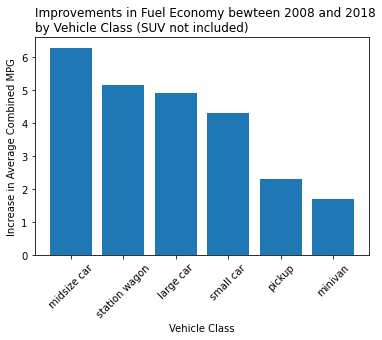

In [49]:
plt.bar(x = veh_imprv.index, height = veh_imprv.values);
plt.xlabel('Vehicle Class')
plt.xticks(rotation = 45)
plt.ylabel('Increase in Average Combined MPG')
plt.title('Improvements in Fuel Economy bewteen 2008 and 2018\nby Vehicle Class (SUV not included)',
          loc = 'left');

Except SUVs, Midsize cars have improved the most by more than 6 MPG, followed by Station Wagon. Minivan has the least improvement in fuel economy measured by average combined MPG.

### Q3: What are the characteristics of SmartWay vehicles? Have they changed over time?

We can analyze this by filtering each dataframe by SmartWay classification and exploring these datasets.

In [61]:
df_08.smartway.value_counts()

no     607
yes    380
Name: smartway, dtype: int64

In [59]:
# Let'see data when smartway == yes
df_08.query('smartway == "yes"').describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,2.602895,4.826316,7.365789,20.984211,28.413158,23.736842,6.868421
std,0.623436,1.002025,1.148195,3.442672,3.075194,3.060379,0.827338
min,1.300000,4.000000,6.000000,17.000000,22.000000,20.000000,6.000000
25%,2.275000,4.000000,7.000000,19.000000,26.000000,22.000000,6.000000
50%,2.400000,4.000000,7.000000,20.000000,28.000000,23.000000,7.000000
75%,3.000000,6.000000,7.000000,22.000000,30.000000,25.000000,7.000000
max,5.000000,8.000000,9.500000,48.000000,45.000000,46.000000,10.000000


In [62]:
df_18.smartway.value_counts() 

No       724
Yes       91
Elite     17
Name: smartway, dtype: int64

In [63]:
# Let's see data when smartway == yes or == elite
df_08.query('smartway in ["yes","elite"]').describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,2.602895,4.826316,7.365789,20.984211,28.413158,23.736842,6.868421
std,0.623436,1.002025,1.148195,3.442672,3.075194,3.060379,0.827338
min,1.300000,4.000000,6.000000,17.000000,22.000000,20.000000,6.000000
25%,2.275000,4.000000,7.000000,19.000000,26.000000,22.000000,6.000000
50%,2.400000,4.000000,7.000000,20.000000,28.000000,23.000000,7.000000
75%,3.000000,6.000000,7.000000,22.000000,30.000000,25.000000,7.000000
max,5.000000,8.000000,9.500000,48.000000,45.000000,46.000000,10.000000


### Q4: What features are associated with better fuel economy?

You can explore trends between cmb_mpg and the other features in this dataset, or filter this dataset like in the previous question and explore the properties of that dataset. For example, you can select all vehicles that have the top 50% fuel economy ratings like this.

In [65]:
df_08.query('cmb_mpg > cmb_mpg.median()').describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000
mean,2.516000,4.668235,7.103529,20.974118,28.280000,23.654118,6.781176
std,0.549981,0.919163,1.218417,3.167760,2.928262,2.835155,0.825092
min,1.300000,4.000000,4.000000,17.000000,22.000000,21.000000,6.000000
25%,2.200000,4.000000,6.000000,19.000000,26.000000,22.000000,6.000000
50%,2.400000,4.000000,7.000000,20.000000,28.000000,23.000000,7.000000
75%,2.700000,6.000000,7.000000,22.000000,30.000000,25.000000,7.000000
max,6.000000,8.000000,9.500000,48.000000,45.000000,46.000000,10.000000


In [66]:
df_18.query('cmb_mpg > cmb_mpg.median()').describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000
mean,2.060367,4.165354,4.713911,26.606299,34.398950,29.519685,6.144357
std,0.484854,0.673918,1.886110,10.462583,8.681705,9.612369,1.387027
min,1.200000,3.000000,1.000000,20.000000,27.000000,24.000000,4.000000
25%,1.800000,4.000000,3.000000,22.000000,30.000000,25.000000,5.000000
50%,2.000000,4.000000,5.000000,24.000000,32.000000,27.000000,6.000000
75%,2.000000,4.000000,7.000000,27.000000,36.000000,30.000000,7.000000
max,3.600000,6.000000,7.000000,113.000000,99.000000,106.000000,10.000000


---
## `6.` Results with Merged Dataset

### Merging Datasets
Use Pandas Merges to create a combined dataset from `clean_08.csv` and `clean_18.csv`.

In [74]:
# rename columns of 2008 and 2018 # shorten column length 
df_08.rename(columns = lambda x: x[0:10] + '_08', inplace = True)
df_08.head(1)

,model_08,displ_08,cyl_08,trans_08,drive_08,fuel_08,veh_class_08,air_pollut_08,city_mpg_08,hwy_mpg_08,cmb_mpg_08,greenhouse_08,smartway_08
0,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7.0,15.0,20.0,17.0,4,no


In [71]:
df_18.rename(columns = lambda x: x[0:10] + '_18', inplace = True)
df_18.head(1)

In [82]:
# as we want to see the difference between 2008 and 2018,
# we remove models do not repeat
df_combined = pd.merge(left = df_08, right = df_18, 
                       left_on = 'model_08', right_on = 'model_18', how = 'inner')

In [94]:
print(df_combined.info())
df_combined.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 922 entries, 0 to 921
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   model_08       922 non-null    object 
 1   displ_08       922 non-null    float64
 2   cyl_08         922 non-null    int64  
 3   trans_08       922 non-null    object 
 4   drive_08       922 non-null    object 
 5   fuel_08        922 non-null    object 
 6   veh_class_08   922 non-null    object 
 7   air_pollut_08  922 non-null    float64
 8   city_mpg_08    922 non-null    float64
 9   hwy_mpg_08     922 non-null    float64
 10  cmb_mpg_08     922 non-null    float64
 11  greenhouse_08  922 non-null    int64  
 12  smartway_08    922 non-null    object 
 13  model_18       922 non-null    object 
 14  displ_18       922 non-null    float64
 15  cyl_18         922 non-null    int64  
 16  trans_18       922 non-null    object 
 17  drive_18       922 non-null    object 
 18  fuel_18   

,model_08,displ_08,cyl_08,trans_08,drive_08,fuel_08,veh_class_08,air_pollut_08,city_mpg_08,hwy_mpg_08,...,trans_18,drive_18,fuel_18,veh_class_18,air_pollut_18,city_mpg_18,hwy_mpg_18,cmb_mpg_18,greenhouse_18,smartway_18
0,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,7.0,17.0,22.0,...,SemiAuto-6,2WD,Gasoline,small SUV,3.0,20.0,28.0,23.0,5,No
1,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,7.0,17.0,22.0,...,SemiAuto-6,4WD,Gasoline,small SUV,3.0,19.0,27.0,22.0,4,No
2,AUDI A3,2.0,4,Man-6,2WD,Gasoline,station wagon,7.0,21.0,29.0,...,AMS-6,4WD,Gasoline,small car,7.0,24.0,31.0,27.0,6,No
3,AUDI A3,2.0,4,Man-6,2WD,Gasoline,station wagon,7.0,21.0,29.0,...,AMS-7,2WD,Gasoline,small car,7.0,26.0,35.0,29.0,6,No
4,AUDI A3,2.0,4,Auto-S6,2WD,Gasoline,station wagon,7.0,22.0,29.0,...,AMS-6,4WD,Gasoline,small car,7.0,24.0,31.0,27.0,6,No


In [89]:
df_combined.isnull().any(axis=0).sum()

0

In [93]:
df_combined.duplicated().sum()

0

In [95]:
# storing the merged data
df_combined.to_csv('combined_dataset.csv', index = False)

### Q5: For all of the models that were produced in 2008 that are still being produced now, how much has the mpg improved and which vehicle improved the most?

In [96]:
# load dataset
import pandas as pd
df = pd.read_csv('combined_dataset.csv')

In [97]:
df.head(3)

,model_08,displ_08,cyl_08,trans_08,drive_08,fuel_08,veh_class_08,air_pollut_08,city_mpg_08,hwy_mpg_08,...,trans_18,drive_18,fuel_18,veh_class_18,air_pollut_18,city_mpg_18,hwy_mpg_18,cmb_mpg_18,greenhouse_18,smartway_18
0,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,7.0,17.0,22.0,...,SemiAuto-6,2WD,Gasoline,small SUV,3.0,20.0,28.0,23.0,5,No
1,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,7.0,17.0,22.0,...,SemiAuto-6,4WD,Gasoline,small SUV,3.0,19.0,27.0,22.0,4,No
2,AUDI A3,2.0,4,Man-6,2WD,Gasoline,station wagon,7.0,21.0,29.0,...,AMS-6,4WD,Gasoline,small car,7.0,24.0,31.0,27.0,6,No


1. Create a new dataframe, `model_mpg`, that contain the mean combined mpg values in 2008 and 2018 for each unique model

In [101]:
model_mpg = df.groupby('model_18')[['cmb_mpg_08', 'cmb_mpg_18']].mean()
model_mpg.head()

,cmb_mpg_08,cmb_mpg_18
model_18,,
ACURA RDX,19.000000,22.500000
AUDI A3,23.333333,28.000000
AUDI A4,21.000000,27.000000
AUDI A6,19.666667,25.666667
AUDI A8 L,16.500000,22.000000


2. Create a new column, `mpg_change`, with the change in mpg

In [103]:
model_mpg['mpg_change'] = model_mpg.cmb_mpg_18 - model_mpg.cmb_mpg_08
model_mpg.head()

,cmb_mpg_08,cmb_mpg_18,mpg_change
model_18,,,
ACURA RDX,19.000000,22.500000,3.500000
AUDI A3,23.333333,28.000000,4.666667
AUDI A4,21.000000,27.000000,6.000000
AUDI A6,19.666667,25.666667,6.000000
AUDI A8 L,16.500000,22.000000,5.500000


3. Find the vehicle that improved the most

In [104]:
model_mpg.mpg_change.nlargest() 

model_18
VOLVO XC 90          16.533333
CHEVROLET Malibu     10.666667
CHEVROLET Equinox     8.833333
AUDI S4               8.500000
AUDI S5               8.000000
Name: mpg_change, dtype: float64

Pandas also has a useful [`idxmax`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.idxmax.html) function you can use to find the index of the row containing a column's maximum value!

In [105]:
model_mpg.mpg_change.idxmax()

'VOLVO XC 90'

In [107]:
model_mpg.loc[model_mpg.mpg_change.idxmax()]

cmb_mpg_08    15.666667
cmb_mpg_18    32.200000
mpg_change    16.533333
Name: VOLVO XC 90, dtype: float64